# Encoding,Dimentionality reduction and Feature selection 
<!-- using Allele frequency conservation   -->

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path
from sklearn.model_selection import train_test_split
import dask
import dask.dataframe as dd
from dask import delayed

In [4]:
def label_encoding_dim_category_reduction(df_in, category_col,country):
    try:
        # Print the processing status with the DataFrame name
        print("Processing DataFrame:", country)

        X = df_in.drop(columns=['category'])  # Features
        y = df_in['category']  # Target variable

        # Split the data into a 70% training set and a 30% test set with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=142)

        # Create new DataFrames for the training and test sets
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([train_df, y_test], axis=1)
        test_df.to_csv(f"{country}_test_data.csv")
        processed_data_list = []  # To store processed data for all categories
        unique_categories = train_df[category_col].unique()

        for category in unique_categories:
            category_data = train_df[train_df[category_col] == category]

            dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
            snp_data = category_data.drop(columns=dropped_columns)

            print(f"Processing category: {category}")

            # Create a custom label encoding map
            custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}

            # Apply custom label encoding to categorical columns
            categorical_cols = snp_data.select_dtypes(include=['object']).columns
            snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))

            # Calculate the frequency of each character for each SNP column
            character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))

            # Set a threshold for character frequency
            frequency_threshold = 0.8

            # Identify SNP loci where a single character appears >= 80% of the time
            highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]

            # Get DataFrame with the filtered columns
            filtered_columns = highly_conserved_loci.index.tolist()
            df_filtered = snp_data[filtered_columns]

            # Combine non-categorical variables with informative SNP columns
            data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
            processed_data_list.append(data_combined)

            # Plotting (uncomment this section if needed)
            # top_ten_conserved = df_filtered.mean().nlargest(20)
            # plt.figure(figsize=(10, 6))
            # top_ten_conserved.plot(kind='bar', color='blue')
            # plt.title(f"Top Ten Conserved SNP's in {category}")
            # plt.xlabel('genomic position of the SNP')
            # plt.ylabel('Frequency')
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
            # plt.show()

        concatenated_data = pd.concat(processed_data_list, ignore_index=True)

        # Save processed data
        processed_filename = f"{country}_category.csv"
        concatenated_data.to_csv(processed_filename, index=False)

        return concatenated_data
    except:
                # Print the processing status with the DataFrame name
        print("Processing DataFrame:", country)

        # Assuming 'category' is the column you want to stratify by in df_uganda
        X = df_in.drop(columns=['category'])  # Features
        y = df_in['category']  # Target variable

        # Split the data into a 70% training set and a 30% test set with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

        # Create new DataFrames for the training and test sets
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([train_df, y_test], axis=1)
        test_df.to_csv(f"{country}_test_data.csv")
        processed_data_list = []  # To store processed data for all categories
        unique_categories = train_df[category_col].unique()

        for category in unique_categories:
            category_data = train_df[train_df[category_col] == category]

            dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
            snp_data = category_data.drop(columns=dropped_columns)

            print(f"Processing category: {category}")

            # Create a custom label encoding map
            custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}

            # Apply custom label encoding to categorical columns
            categorical_cols = snp_data.select_dtypes(include=['object']).columns
            snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))

            # Calculate the frequency of each character for each SNP column
            character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))

            # Set a threshold for character frequency
            frequency_threshold = 0.8

            # Identify SNP loci where a single character appears >= 80% of the time
            highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]

            # Get DataFrame with the filtered columns
            filtered_columns = highly_conserved_loci.index.tolist()
            df_filtered = snp_data[filtered_columns]

            # Combine non-categorical variables with informative SNP columns
            data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
            processed_data_list.append(data_combined)

            # Plotting (uncomment this section if needed)
            # top_ten_conserved = df_filtered.mean().nlargest(20)
            # plt.figure(figsize=(10, 6))
            # top_ten_conserved.plot(kind='bar', color='blue')
            # plt.title(f"Top Ten Conserved SNP's in {category}")
            # plt.xlabel('genomic position of the SNP')
            # plt.ylabel('Frequency')
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
            # plt.show()

        concatenated_data = pd.concat(processed_data_list, ignore_index=True)

        # Save processed data
        processed_filename = f"{country}_category.csv"
        concatenated_data.to_csv(processed_filename, index=False)

        return concatenated_data
        

# # Example usage
# # Load your DataFrame here
# # df = pd.read_csv("your_data.csv")
# # Specify the name of the category column
# category_column_name = "CategoryName"
# label_encoding_dim_category_reduction(df, category_column_name)

In [3]:
# 1. Uganda
df_uganda=pd.read_csv("uganda_processed.csv")
df_uganda

,Unnamed: 0,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,...,4823842,4837294,4840453,4840840,4841378,4841551,4845526,4854099,4856766,4856823
0,0,poultry,poultry,SAMN06240031,SRR5232001,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
1,1,poultry,poultry,SAMN06240033,SRR5232010,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
2,2,poultry,poultry,SAMN06240029,SRR5232012,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
3,3,poultry,poultry,SAMN06240034,SRR5232014,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
4,4,poultry,poultry,SAMN06240035,SRR5232024,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
5,5,poultry,poultry,SAMN06240085,SRR5251197,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
6,6,poultry,poultry,SAMN06240089,SRR5251233,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
7,7,poultry,poultry,SAMN06240091,SRR5251242,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
8,8,poultry,poultry,SAMN06240088,SRR5251417,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
9,9,poultry,poultry,SAMN06240086,SRR5251517,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N


In [4]:
df_uganda.drop(columns="Unnamed: 0")
df_uganda

,Unnamed: 0,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,...,4823842,4837294,4840453,4840840,4841378,4841551,4845526,4854099,4856766,4856823
0,0,poultry,poultry,SAMN06240031,SRR5232001,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
1,1,poultry,poultry,SAMN06240033,SRR5232010,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
2,2,poultry,poultry,SAMN06240029,SRR5232012,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
3,3,poultry,poultry,SAMN06240034,SRR5232014,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
4,4,poultry,poultry,SAMN06240035,SRR5232024,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
5,5,poultry,poultry,SAMN06240085,SRR5251197,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
6,6,poultry,poultry,SAMN06240089,SRR5251233,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
7,7,poultry,poultry,SAMN06240091,SRR5251242,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
8,8,poultry,poultry,SAMN06240088,SRR5251417,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N
9,9,poultry,poultry,SAMN06240086,SRR5251517,uganda,N,G,C,T,...,N,N,N,N,N,N,N,N,N,N


In [7]:
df_uganda.drop(columns="Unnamed: 0")
df_ug=label_encoding_dim_category_reduction(df_in=df_uganda, category_col="category",country="uganda")
df_ug

Processing DataFrame: uganda
Processing category: poultry
Processing category: bovine


,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4101148,4101149,4101151,4101160,4101161,4101162,4101163,4101179,4251527,4529151
0,poultry,poultry,SAMN06238269,SRR5280385,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,poultry,poultry,SAMN06238275,SRR5278820,uganda,4,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poultry,poultry,SAMN06238271,SRR5278818,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,poultry,poultry,SAMN06238274,SRR5278813,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,poultry,poultry,SAMN06240032,SRR5231989,uganda,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,poultry,poultry,SAMN06240089,SRR5251233,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,poultry,poultry,SAMN06240031,SRR5232001,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,poultry,poultry,SAMN06240090,SRR5251514,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,poultry,poultry,SAMN06238262,SRR5278830,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,poultry,poultry,SAMN06238276,SRR5278821,uganda,0,3,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_ug.to_csv("uganda_final_training1.csv",index=False)

In [9]:
# 1. ethiopia
df_ethipoia=pd.read_csv("ethiopia_processed.csv")
df_ethipoia

,Isolation source,category,BioSample,sra_accession,country,15,27,78,480,504,...,4782628,4782643,4782649,4782673,65846,294358,294396,3950416,4201527,4831514
0,feces poultry,poultry,SAMN03576822,SRR2005736,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
1,feces (Bos taurus),bovine,SAMN03576821,SRR2032008,ethipia,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
2,bovine skin,bovine,SAMN03577111,SRR3027613,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
3,bovine skin,bovine,SAMN03577114,SRR3027617,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
4,swine lymph node,swine,SAMN03577124,SRR3027652,ethipia,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,feces (Bos taurus),bovine,SAMN03576818,SRR9090895,ethipia,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
224,feces swine,swine,SAMN03577146,SRR9090935,ethipia,N,N,N,N,T,...,N,N,N,N,N,N,N,N,N,N
225,feces poultry,poultry,SAMN03576814,SRR9090952,ethipia,N,N,N,N,T,...,N,N,N,N,N,N,N,N,N,N
226,feces poultry,poultry,SAMN03576813,SRR9090953,ethipia,N,N,N,N,T,...,C,G,A,A,N,N,N,N,N,N


In [10]:
df_thiopia=label_encoding_dim_category_reduction(df_in=df_ethipoia, category_col="category",country="ethiopia")
df_thiopia

Processing DataFrame: ethiopia
Processing category: bovine
Processing category: swine
Processing category: poultry


,Isolation source,category,BioSample,sra_accession,country,534,1095,1647,2088,2376,...,3890094,3890098,3923793,3968300,4008739,4042172,4136831,4223941,4316424,4378759
0,bovine rumen,bovine,SAMN03577128,SRR3027662,ethipia,4,0.0,4.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,feces (Bos taurus),bovine,SAMN03577294,SRR3088913,ethipia,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bovine carcass swab,bovine,SAMN03577391,SRR6410976,ethipia,4,1.0,4.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,feces (Bos taurus),bovine,SAMN03577296,SRR3088909,ethipia,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,feces (Bos taurus),bovine,SAMN03577401,SRR6411035,ethipia,4,0.0,4.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,feces poultry,poultry,SAMN03577385,SRR6411074,ethipia,4,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,feces poultry,poultry,SAMN03577381,SRR6411030,ethipia,4,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,feces poultry,poultry,SAMN03577369,SRR6410948,ethipia,4,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,chicken carcass,poultry,SAMN03577058,SRR4243071,ethipia,4,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [11]:
df_thiopia.to_csv("ethiopia_final_training1.csv")

In [13]:
def category_allocation(df_data):
    # List of terms related to various categories
    bovine_terms = ['cattle stool','red meat spice rub',"feces (Bos taurus)","feces bovine",'cow','Bovine (Organ)','Bovine (Fecal)','stool (Bos taurus)','Bovine (Meat)','Bovine faeces','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
    poultry_terms = ['poultry feed','white meat spice rub','Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
                     'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water','poultry', 'Poultry meat', 'Poultry liver', 'Chicken House Swab',
       'Chicken litter',"broiler carcass swab","feces poultry",'Chicken Feces',"chicken carcass",'Chicken rectal swab','broiler chicken','Poultry (Meat)', 'Poultry (Fecal)','chicken']
    swine_terms=["feces swine","swine","swine stool","pig stool",'Swine (Organ)',"feces swine","swine feces"]
#         'red meat spice rub', 'white meat spice rub', 'meat'

    # Create the dictionary for replacement
    replacement_dict = {}
    for term in bovine_terms:
        replacement_dict[term] = 'bovine'
    for term in poultry_terms:
        replacement_dict[term] = 'poultry'
    for term in swine_terms:
        replacement_dict[term] = 'swine'

    # Function to replace terms based on the dictionary
    def replace_terms(description):
        for term, replacement in replacement_dict.items():
            if term in description:
                return replacement
        return description

    # Create the 'category' column using apply
    df_data['category'] = df_data['Isolation source'].apply(replace_terms)

    # Reorder the columns to insert 'category' as the second column
    column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
    df_new = df_data[column_order]

    return df_new
df_kenya=pd.read_csv("kenya_processed.csv")
df_kenya=category_allocation(df_kenya)

In [14]:
# kenya
# df_kenya=pd.read_csv("kenya_processed.csv")

In [15]:
df_kenya=df_kenya.drop(columns=["Unnamed: 0.1","Unnamed: 0"])
df_kenya

,Isolation source,category,BioSample,sra_accession,country,15,27,78,480,504,...,4839562,4841514,4841563,4843995,4851006,4853017,4855381,20462,65978,2914287
0,feces swine,swine,SAMN03576958,SRR2163243,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,feces swine,swine,SAMN03576962,SRR2163246,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,feces swine,swine,SAMN03576963,SRR2163247,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
3,feces swine,swine,SAMN03576956,SRR2163254,kenya,T,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
4,feces swine,swine,SAMN03576959,SRR2163255,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,feces swine,swine,SAMN03577020,SRR2981160,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
69,feces swine,swine,SAMN03577015,SRR2981161,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
70,feces swine,swine,SAMN03577005,SRR2981162,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
71,feces swine,swine,SAMN03577026,SRR3272062,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N


In [16]:
# %%time
# # kenya
# df_kenya=pd.read_csv("kenya_processed.csv")

In [17]:

df_kenya=label_encoding_dim_category_reduction(df_in=df_kenya, category_col="category",country="kenya")
df_kenya
df_kenya.to_csv("kenya_final_training1.csv")

Processing DataFrame: kenya
Processing category: swine


In [18]:
df_kenya.fillna(0).to_csv("kenya_final_training1.csv")

In [20]:
df_tanzania=pd.read_csv("tanzania_processed.csv")
category=["bovine","swine","poultry"]
df_tanzania=df_tanzania[df_tanzania["category"].isin(category)]
df_tanzania

,Isolation source,category,BioSample,sra_accession,Unnamed: 0,country,22,23,36,43,...,4841673,4841793,4844655,4851050,4854011,4854114,4854186,4854195,4854340,4855889
5,feces (Bos taurus),bovine,SAMN03576899,SRR4243015,44,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
6,feces (Bos taurus),bovine,SAMN03576923,SRR4243028,54,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
7,broiler carcass swab,poultry,SAMN03576945,SRR4243037,62,tanzania,G,C,N,N,...,N,N,N,N,N,N,N,N,N,N
8,feces (Bos taurus),bovine,SAMN03576935,SRR4123976,35,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
9,feces poultry,poultry,SAMN03576936,SRR4123977,36,tanzania,G,C,G,C,...,N,N,N,N,N,N,N,N,N,N
10,feces (Bos taurus),bovine,SAMN03576919,SRR4123948,26,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
11,broiler carcass swab,poultry,SAMN03576950,SRR4123984,42,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
13,feces poultry,poultry,SAMN03576807,SRR8980101,75,tanzania,N,C,N,N,...,A,A,C,C,G,G,C,A,T,C
14,feces (Bos taurus),bovine,SAMN03576902,SRR4123917,21,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
15,feces bovine,bovine,SAMN03576943,SRR4123981,40,tanzania,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [28]:
%%time
df_tanzania=label_encoding_dim_category_reduction(df_in=df_tanzania, category_col="category",country="tanzania")
df_tanzania=df_tanzania.fillna(0)
df_tanzania
df_tanzania.to_csv("tanzania_final_training1.csv")

Processing DataFrame: tanzania
Processing category: bovine
Processing category: swine
Processing category: poultry
CPU times: user 6h 28min 50s, sys: 33.8 s, total: 6h 29min 23s
Wall time: 6h 28min 53s


In [29]:
# def label_encoding_dim_category_reduction_sa(df_in, category_col,country):
    
#     # Assuming 'category' is the column you want to stratify by in df_uganda
#     X = df_in.drop(columns=['category'])  # Features
#     y = df_in['category']  # Target variable

#     # Split the data into a 70% training set and a 30% test set with stratification
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

#     # Create new DataFrames for the training and test sets
#     train_df = pd.concat([X_train, y_train], axis=1)
#     test_df = pd.concat([train_df, y_test], axis=1)
#     test_df.to_csv(f"{country}_test_data.csv")
#     processed_data_list = []  # To store processed data for all categories
#     unique_categories = train_df[category_col].unique()
    
#     for category in unique_categories:
#         category_data = df_in[df_in[category_col] == category]
        
#         dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
#         snp_data = category_data.drop(columns=dropped_columns)
        
#         print(f"Processing category: {category}")
        
#         # Create a custom label encoding map
#         custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}
    
#         # Apply custom label encoding to categorical columns
#         categorical_cols = snp_data.select_dtypes(include=['object']).columns
#         snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))
    
#         # Calculate the frequency of each character for each SNP column
#         character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))
        
#         # Set a threshold for character frequency
#         frequency_threshold = 0.8
        
#         # Identify SNP loci where a single character appears >= 80% of the time
#         highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]
        
#         # Get DataFrame with the filtered columns
#         filtered_columns = highly_conserved_loci.index.tolist()
#         df_filtered = snp_data[filtered_columns]

#         # Combine non-categorical variables with informative SNP columns
#         data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
#         processed_data_list.append(data_combined)
        
#         # Plotting (uncomment this section if needed)
#         # top_ten_conserved = df_filtered.mean().nlargest(20)
#         # plt.figure(figsize=(10, 6))
#         # top_ten_conserved.plot(kind='bar', color='blue')
#         # plt.title(f"Top Ten Conserved SNP's in {category}")
#         # plt.xlabel('genomic position of the SNP')
#         # plt.ylabel('Frequency')
#         # plt.xticks(rotation=45)
#         # plt.tight_layout()
#         # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
#         # plt.show()

#     concatenated_data = pd.concat(processed_data_list, ignore_index=True)
    
#     # Save processed data
#     processed_filename = f"{country}_category.csv"
#     concatenated_data.to_csv(processed_filename, index=False)
    
#     return concatenated_data

# # # Example usage
# # # Load your DataFrame here
# # # df = pd.read_csv("your_data.csv")
# # # Specify the name of the category column
# # category_column_name = "CategoryName"
# # label_encoding_dim_category_reduction(df, category_column_name)

In [30]:
df_tanzania

,Isolation source,category,BioSample,sra_accession,country,22,23,36,43,216,...,4173827,4278749,4381206,4644929,4768577,224344,224349,224350,224351,3414769
0,feces (Bos taurus),bovine,SAMN03576899,SRR4243015,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,feces (Bos taurus),bovine,SAMN03576902,SRR4123917,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,feces (Bos taurus),bovine,SAMN03576933,SRR4123972,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,feces bovine,bovine,SAMN03576939,SRR4123978,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,feces (Bos taurus),bovine,SAMN03576917,SRR4243025,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,feces bovine,bovine,SAMN03576949,SRR4123989,tanzania,3.0,4.0,3,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,feces bovine,bovine,SAMN03576938,SRR4243035,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,feces (Bos taurus),bovine,SAMN03576919,SRR4123948,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,feces (Bos taurus),bovine,SAMN03576923,SRR4243028,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,feces (Bos taurus),bovine,SAMN03576935,SRR4123976,tanzania,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
%%time
# kenya
df_sa=pd.read_csv("south_africa_processed.csv")

CPU times: user 18.2 s, sys: 1e+03 ns, total: 18.2 s
Wall time: 18.2 s


In [33]:
df_sa=label_encoding_dim_category_reduction(df_in=df_sa, category_col="category",country="south_africa")
df_sa
df_sa.fillna(0).to_csv("south_africa_final_training1.csv")
df_sa

Processing DataFrame: south_africa
Processing DataFrame: south_africa
Processing category: poultry
Processing category: bovine
Processing category: swine


,Isolation source,category,BioSample,sra_accession,country,765,1275,1602,1801,1995,...,456478,830353,1025859,1531870,2631497,4541113,4561549,369198,472940,472952
0,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,2.0,2.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Poultry (Meat),poultry,SAMN19025270,SRR14434488,south_africa,2.0,2.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicken,poultry,SAMN12058707,SRR9050348,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Poultry (Fecal),poultry,SAMN19025304,SRR14434451,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Poultry (Fecal),poultry,SAMN19025315,SRR14434439,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Poultry (Fecal),poultry,SAMN19025283,SRR14434474,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Poultry (Meat),poultry,SAMN19025280,SRR14434477,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Poultry (Meat),poultry,SAMN19025295,SRR14434461,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Poultry (Fecal),poultry,SAMN19025277,SRR14434480,south_africa,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Poultry (Meat),poultry,SAMN19025256,SRR14434494,south_africa,2.0,2.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
%%time
# kenya
df_mauritias=pd.read_csv("mauritias_processed.csv")

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.46 s


In [35]:
df_mauritias=label_encoding_dim_category_reduction(df_in=df_mauritias, category_col="category",country="mauritias")
df_mauritias
df_mauritias.fillna(0).to_csv("mauritias_final_training1.csv")

Processing DataFrame: mauritias
Processing category: poultry


In [36]:
%%time
# kenya
df_senegal=pd.read_csv("senegal_processed.csv")


CPU times: user 43.9 s, sys: 27.9 ms, total: 43.9 s
Wall time: 43.9 s


In [37]:
df_senegal=label_encoding_dim_category_reduction(df_in=df_senegal, category_col="category",country="senegal")
df_senegal
df_senegal.fillna(0).to_csv("senegal_final_training1.csv")

Processing DataFrame: senegal
Processing category: poultry


In [38]:
%%time
# kenya
df_tunisia=pd.read_csv("../data/tunisia_processed.csv")

CPU times: user 6min 7s, sys: 6.68 s, total: 6min 14s
Wall time: 6min 14s


In [39]:
df_tunisia=label_encoding_dim_category_reduction(df_in=df_tunisia, category_col="category",country="tunisia")
df_tunisia
df_tunisia.fillna(0).to_csv("tunisia_final_training1.csv")

Processing DataFrame: tunisia
Processing category: poultry
Processing category: bovine


In [40]:
%%time
# kenya
df_nigeria_poultry=pd.read_csv("../data/nigeria_poultry_metadata.csv")

CPU times: user 4min 36s, sys: 1.88 s, total: 4min 38s
Wall time: 4min 38s


In [41]:
df_nigeria_poultry=label_encoding_dim_category_reduction(df_in=df_nigeria_poultry, category_col="category",country="nigeria_poultry")
df_nigeria_poultry
df_nigeria_poultry.fillna(0).to_csv("nigeria_poultry_final_training1.csv")

Processing DataFrame: nigeria_poultry
Processing category: poultry


In [ ]:
%%time
# kenya
df_nigeria_swine=pd.read_csv("../data/nigeria_pig_metadata.csv")

In [ ]:
df_nigeria_swine=label_encoding_dim_category_reduction(df_in=df_nigeria_swine, category_col="category",country="nigeria_swine")
df_nigeria_swine
df_nigeria_swine.fillna(0).to_csv("nigeria_swine_final_training1.csv")

In [51]:
%%time
# kenya
df_nigeria_bovine=pd.read_csv("../data/nigeria_bovine_metadata.csv")

CPU times: user 7min 50s, sys: 8.16 s, total: 7min 58s
Wall time: 7min 58s


In [52]:
%%time
df_nigeria_bovine=label_encoding_dim_category_reduction(df_in=df_nigeria_bovine, category_col="category",country="nigeria_bovine")
df_nigeria_bovine
df_nigeria_bovine.fillna(0).to_csv("nigeria_bovine_final_training1.csv")

Processing DataFrame: nigeria_bovine
Processing category: bovine
CPU times: user 2h 6min 24s, sys: 24.7 s, total: 2h 6min 49s
Wall time: 2h 6min 38s


In [53]:
%%time
# kenya
df_human=pd.read_csv("human_cat_sa_processed.csv")

CPU times: user 7min 4s, sys: 3.72 s, total: 7min 8s
Wall time: 7min 8s


In [ ]:
df_human=label_encoding_dim_category_reduction(df_in=df_human, category_col="category",country="south_africa_human")
df_human
df_human.fillna(0).to_csv("south_africa_human_final_training1.csv")

Processing DataFrame: south_africa_human
Processing category: human


In [15]:
%%time
# kenya
df_tunisia_human=pd.read_csv("human_tunisia_processed1.csv")

CPU times: user 1min 10s, sys: 990 ms, total: 1min 11s
Wall time: 1min 11s


In [16]:
# Assuming you want to rename the 'old_column_name' to 'new_column_name'
df_tunisia_human=df_tunisia_human.rename(columns={'Location': 'country'})


In [17]:
df_tunisia_human

,Isolation source,category,BioSample,country,sra_accession,480,534,646,793,796,...,4123656,4123662,4579496,4579502,4579505,4579510,4579534,4579549,4579550,4579551
0,human,human,SAMN33426578,Tunisia,SRR23603204,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
1,human,human,SAMN33426577,Tunisia,SRR23603215,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
2,human,human,SAMN33426576,Tunisia,SRR23603226,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
3,human,human,SAMN33426575,Tunisia,SRR23603237,G,C,T,N,N,...,N,N,N,N,N,N,N,N,N,N
4,human,human,SAMN33426620,Tunisia,SRR23603246,G,C,T,N,N,...,N,N,N,N,N,N,N,N,N,N
5,human,human,SAMN33426619,Tunisia,SRR23603247,G,C,N,N,N,...,N,N,N,N,N,N,N,N,N,N
6,human,human,SAMN33426574,Tunisia,SRR23603248,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
7,human,human,SAMN33426618,Tunisia,SRR23603249,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
8,human,human,SAMN33426617,Tunisia,SRR23603250,G,C,T,C,N,...,N,N,N,N,N,N,N,N,N,N
9,human,human,SAMN33426616,Tunisia,SRR23603251,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N


In [18]:
%%time
df_tunisia_human=label_encoding_dim_category_reduction(df_in=df_tunisia_human, category_col="category",country="tunisia_human")
df_tunisia_human
df_tunisia_human.fillna(0).to_csv("tunisa_human_final_training1.csv")

Processing DataFrame: tunisia_human
Processing category: human
CPU times: user 38min 28s, sys: 18.3 s, total: 38min 47s
Wall time: 38min 41s


In [59]:
df_all=[df_ug,df_ethipoia,df_kenya,df_tanzania,df_sa,df_mauritias,df_senegal,df_tunisia,df_nigeria_swine,df_nigeria_poultry,df_nigeria_bovine,df_tunisia_human,df_human]
len(df_all)

13

In [24]:
# %%time
# #Read all dataframes processed
# df_uganda=pd.read_csv("uganda_final_training1.csv")
# df_kenya=pd.read_csv("kenya_final_training1.csv")
# df_tanzania=pd.read_csv("tanzania_final_training1.csv")
# df_ethiopia=pd.read_csv("ethiopia_final_training1.csv")
# df_south_africa=pd.read_csv("south_africa_final_training1.csv")
# df_tunisia=pd.read_csv("tunisia_final_training1.csv")
# df_sennegal=pd.read_csv("senegal_final_training1.csv")
# df_mauritias=pd.read_csv("mauritias_final_training1.csv")
# df_nigeria_swine=pd.read_csv("nigeria_swine_final_training1.csv")
# df_nigeria_poultry=pd.read_csv("nigeria_poultry_final_training1.csv")
# df_nigeria_bovine=pd.read_csv("nigeria_bovine_final_training1.csv")
# df_tunisia_human=pd.read_csv("tunisa_human_final_training1.csv")
# df_south_africa_human=pd.read_csv("south_africa_human_final_training1")

In [25]:
df_south_africa_human=pd.read_csv("south_africa_human_final_training1.csv")

In [27]:
%%time
# merge all dataframes
df_all=[df_uganda,df_kenya,df_tanzania,df_ethiopia,df_south_africa,df_tunisia,df_sennegal,df_mauritias,df_nigeria_swine,df_nigeria_poultry,df_nigeria_bovine,df_tunisia_human,df_south_africa_human]

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 17.2 µs


In [28]:
%%time
df_all_final=pd.concat(df_all)
df_all_final

CPU times: user 3min 48s, sys: 15.8 s, total: 4min 4s
Wall time: 4min 4s


,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
0,poultry,poultry,SAMN06238269,SRR5280385,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,poultry,poultry,SAMN06238275,SRR5278820,uganda,4.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poultry,poultry,SAMN06238271,SRR5278818,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,poultry,poultry,SAMN06238274,SRR5278813,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,poultry,poultry,SAMN06240032,SRR5231989,uganda,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,human,human,SAMEA7176486,ERR4451352,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,human,human,SAMEA13423149,ERR9287926,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,human,human,SAMEA13423185,ERR9287961,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,human,human,SAMEA7176412,ERR4451279,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


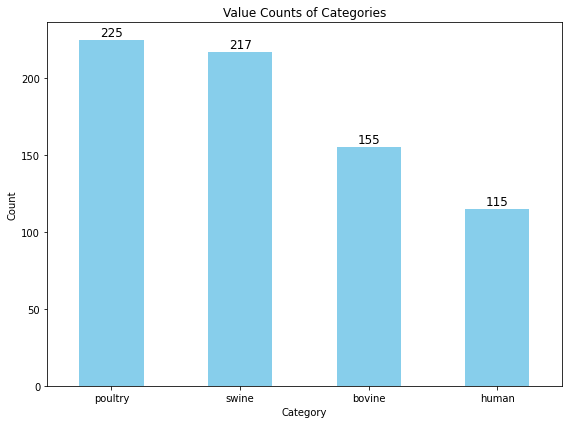

<Figure size 432x288 with 0 Axes>

In [31]:
# Training data distribution
# Calculate value counts
category_counts = df_all_final['category'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the bar plot
ax = category_counts.plot(kind='bar', color='skyblue')

plt.title('Value Counts of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add data labels on top of each bar
for i, v in enumerate(category_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()  # Adjust layout for better readability

plt.show()  # Display the plot
plt.savefig("../figures/training_data_distribution.png")

In [32]:
%%time
df_all_final=df_all_final.fillna(0)

CPU times: user 45.1 s, sys: 7.81 s, total: 52.9 s
Wall time: 52.8 s


In [34]:
df_all_final

,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
0,poultry,poultry,SAMN06238269,SRR5280385,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,poultry,poultry,SAMN06238275,SRR5278820,uganda,4.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,poultry,poultry,SAMN06238271,SRR5278818,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,poultry,poultry,SAMN06238274,SRR5278813,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,poultry,poultry,SAMN06240032,SRR5231989,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,human,human,SAMEA7176486,ERR4451352,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,human,human,SAMEA13423149,ERR9287926,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,human,human,SAMEA13423185,ERR9287961,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,human,human,SAMEA7176412,ERR4451279,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Shuffle the dataframe
df_shuffle = df_all_final.sample(frac=1, random_state=142)
df_shuffle

,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
49,feces swine,swine,SAMN03576991,SRR2847938,kenya,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,feces swine,swine,SAMN03577149,SRR3134909,ethipia,0.0,0.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,pig stool,swine,SAMN07135217,SRR6951172,nigeria,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,feces swine,swine,SAMN03577204,SRR3088941,ethipia,0.0,0.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# %%time
# df_all_final=df_all_final.fillna(0).to_csv("final_training_data1_complete",index=False)

In [47]:
%%time
dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country','Unnamed: 0']
X= df_shuffle.drop(columns=dropped_columns)

CPU times: user 13.2 s, sys: 2.66 s, total: 15.9 s
Wall time: 15.9 s


In [48]:
from sklearn.preprocessing import LabelEncoder
# Merge all dfs
y=df_shuffle["category"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 1, 1, 1, 1,
       3, 0, 2, 0, 3, 2, 2, 2, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 3, 3,
       2, 1, 1, 2, 0, 3, 3, 0, 3, 3, 1, 1, 0, 2, 1, 3, 2, 2, 2, 0, 3, 3,
       1, 2, 1, 3, 2, 0, 1, 2, 2, 2, 3, 3, 2, 2, 0, 1, 3, 2, 2, 0, 0, 3,
       2, 0, 1, 1, 2, 1, 2, 3, 2, 0, 0, 3, 3, 3, 0, 1, 3, 3, 0, 1, 2, 3,
       0, 2, 2, 2, 3, 3, 3, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1,
       3, 2, 3, 2, 2, 2, 0, 3, 2, 2, 0, 0, 3, 1, 1, 0, 0, 3, 3, 0, 0, 2,
       3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 2, 2, 3, 1, 0, 3, 0, 0,
       2, 2, 2, 0, 2, 3, 0, 0, 2, 1, 1, 2, 3, 3, 0, 3, 0, 1, 3, 3, 2, 3,
       0, 2, 0, 2, 2, 0, 1, 3, 2, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 2, 3, 1,
       0, 3, 2, 2, 3, 3, 2, 1, 2, 3, 1, 1, 1, 2, 3, 3, 0, 2, 3, 0, 3, 0,
       3, 0, 2, 3, 3, 2, 3, 0, 0, 1, 0, 2, 3, 1, 1, 3, 2, 2, 3, 3, 2, 0,
       2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 3, 0, 2, 3, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0,

In [49]:
%%time
# Oversampling
from imblearn.over_sampling import SMOTE
# Instantiate the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=142)  

# Apply SMOTE to oversample the minority class
X_over, y_over = smote.fit_resample(X, y_encoded)

CPU times: user 3min 27s, sys: 13.3 s, total: 3min 40s
Wall time: 3min 22s


# Feature Selection

##  Chisquare test

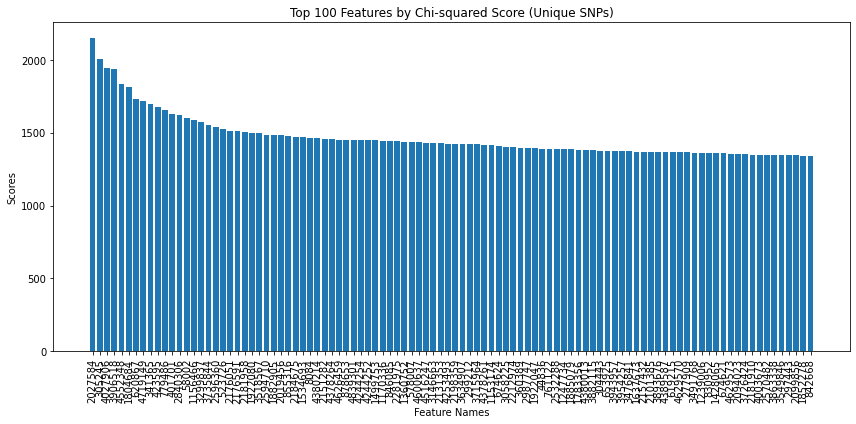

CPU times: user 1min 15s, sys: 4.75 s, total: 1min 19s
Wall time: 1min 16s


<Figure size 432x288 with 0 Axes>

In [51]:
%%time
#boniferrrori correction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have your data X and target variable y
# Initialize the SelectKBest feature selector
sf = SelectKBest(chi2, k='all')

# Fit the feature selector to your data
sf_fit = sf.fit(X_over, y_over)

# Calculate the Bonferroni-corrected significance threshold
desired_familywise_error_rate = 0.05
total_tests = len(X.columns)
bonferroni_threshold = desired_familywise_error_rate / total_tests

# Get p-values for each SNP
p_values = sf_fit.pvalues_

# Select SNPs that pass the Bonferroni correction
significant_snps = X.columns[p_values < bonferroni_threshold]

# Create a DataFrame to hold the feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sf_fit.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Keep track of selected SNP names to avoid duplicates
selected_snps = set()

# Select the top 100 features with unique scores
top_features = []
for index, row in feature_scores.iterrows():
    snp_name = row['Feature']
    if snp_name in significant_snps and snp_name not in selected_snps and len(top_features) < 100:
        selected_snps.add(snp_name)
        top_features.append(row)

# Create a bar plot for the top features
top_features = pd.DataFrame(top_features)
plt.figure(figsize=(18, 8))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("final_features_chsquare.png")

In [52]:
top_features

,Feature,Score
249225,2027584,2149.540107
239611,305245,2008.645847
261405,4027906,1941.999835
260520,3906518,1934.093871
264494,4552348,1837.180328
...,...,...
258265,3549846,1345.908343
666,297443,1345.540856
249698,2099856,1343.515152
248150,1852278,1341.710707


In [56]:
top_features.to_csv("top_10_features_chisquare_final.csv",index=False)

In [60]:
sq=top_features["Feature"].to_list()
category=['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
df_training_chsq=df_shuffle[category+sq]
df_training_chsq.to_csv("chisquare_training_features_final.csv",index=False)

In [ ]:
%%time
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can choose a different classifier based on your problem

# Create a machine learning model (you can choose a different one)
model = RandomForestClassifier(random_state=42)

# Initialize the RFE feature selector with the model
rfe = RFE(model, n_features_to_select=100)  # Specify the number of features to select

# Fit RFE to your data
X_rfe = rfe.fit_transform(X_over, y_over)

# Get the selected features
selected_features = X.columns[rfe.support_]


In [ ]:
selected_features

In [ ]:
# Create a bar plot for the top features
top_features = pd.DataFrame(selected_features)
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("final_features_RFE.png")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data X and target variable y
# Initialize the SelectKBest feature selector
sf = SelectKBest(chi2, k='all')

# Fit the feature selector to your data
sf_fit = sf.fit(X, y)

# Create a DataFrame to hold the feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sf_fit.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Keep track of selected SNP names to avoid duplicates
selected_snps = set()

# Select the top 100 features with unique scores
top_features = []
for index, row in feature_scores.iterrows():
    snp_name = row['Feature']
    if snp_name not in selected_snps and len(top_features) < 100:
        selected_snps.add(snp_name)
        top_features.append(row)

# Create a bar plot for the top features
top_features = pd.DataFrame(top_features)
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_names = ["uganda", "ethiopia", "kenya", "tanzania", "sa", "mauritias", "senegal", "tunisia", "nigeria_swine", "nigeria_poultry", "nigeria_bovine", "tunisia_human", "human"]

In [ ]:
# # Feature selection
# import numpy as np
# # from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import RFECV
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
# X = df_all_label_encoded.drop(columns=dropped_columns)
# y = df_all_label_encoded['category']

# # One-hot encode the target variable y
# y_encoded = pd.get_dummies(y)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Train the Random Forest classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

# # Convert one-hot encoded predictions back to categorical labels
# y_pred_labels = y_encoded.columns[y_pred.argmax(axis=1)]

# # Calculate accuracy
# accuracy = accuracy_score(y_test.idxmax(axis=1), y_pred_labels)
# print(f'Accuracy: {accuracy:.2f}')


# one hot encoded feature importances

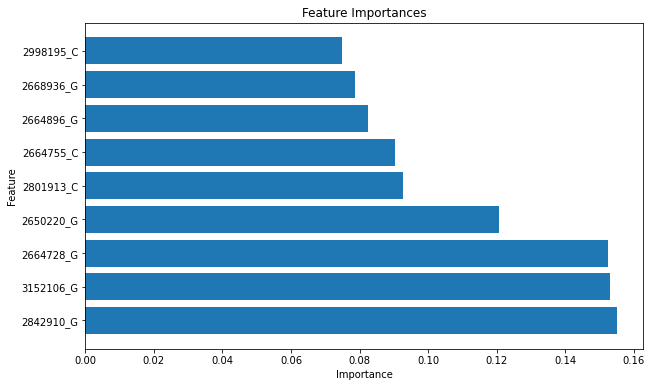

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with the classifier and cross-validation settings
rfecv = RFECV(estimator=clf, step=1, cv=5)  # You can adjust step and cv as needed

# Fit RFECV to your training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Train the Random Forest classifier on the selected features
clf.fit(X_train[selected_features], y_train)

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# label encoding feature importances

In [ ]:
# %%time
# import numpy as np
# # from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import RFECV
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # Split data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest classifier
# # clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Initialize RFECV with the classifier and cross-validation settings
# rfecv = RFECV(estimator=clf, step=1, cv=5)  # You can adjust step and cv as needed
# print("starting fitting the model")

# # Fit RFECV to your training data
# rfecv.fit(X_train, y_train)
# # Get the selected features
# selected_features = X_train.columns[rfecv.support_]
# print("starting training the model")

# # Train the Random Forest classifier on the selected features
# clf.fit(X_train[selected_features], y_train)
# print("getting feature importances")

# # Get feature importances from the trained classifier
# feature_importances = clf.feature_importances_

# # Create a DataFrame to store feature importances
# feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# # Sort the DataFrame by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot the feature importances as a horizontal bar graph
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances')
# plt.savefig('../figures/feature_importances_label_encoded.png')
# plt.show()

In [80]:
df_modified=df_all.fillna(0)

In [ ]:
df_modified

In [ ]:
# df_modified.to_csv("training_data_encoded.csv")

In [ ]:
# common_columns

In [4]:
# import pandas as pd
# df1=pd.read_csv("./nigeria pig.csv")
# df1
# df2=pd.read_csv("./nigeria poultry.csv")
# df3=pd.read_csv("./nigeria bovine.csv")
# df_all_trial=pd.concat([df1,df2,df3])
# df_all_trial=df_all_trial.drop(columns="Unnamed: 0").fillna(0)
# df_all_trial
# # Shuffle the rows
# shuffled_df = df_all_trial.sample(frac=1).reset_index(drop=True)
# shuffled_df

In [ ]:
# df1=pd.read_csv("./nigeria pig.csv")

In [5]:
# # load data
# df_kenya=pd.read_csv("./kenya_processed.csv")
# df_kenya

In [ ]:
# def category_allocation(df_data):
#     # List of terms related to various categories
#     bovine_terms = ['cattle stool','stool (Bos taurus)','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
#     poultry_terms = ['poultry feed', 'Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
#                      'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water']
#     swine_terms=["feces swine","swine","swine stool","pig stool"]

#     # Create the dictionary for replacement
#     replacement_dict = {}
#     for term in bovine_terms:
#         replacement_dict[term] = 'bovine'
#     for term in poultry_terms:
#         replacement_dict[term] = 'poultry'
#     for term in swine_terms:
#         replacement_dict[term] = 'swine'

#     # Function to replace terms based on the dictionary
#     def replace_terms(description):
#         for term, replacement in replacement_dict.items():
#             if term in description:
#                 return replacement
#         return description

#     # Create the 'category' column using apply
#     df_data['category'] = df_data['Isolation source'].apply(replace_terms)

#     # Reorder the columns to insert 'category' as the second column
#     column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
#     df_new = df_data[column_order]

#     return df_new

# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Categorize isolation sources in a DataFrame")
#     parser.add_argument("--input_file", required=True, help="Path to the input CSV file")
#     parser.add_argument("--output_file", required=True, help="Path to the output CSV file")

#     args = parser.parse_args()

#     input_file_path = args.input_file
#     output_file_path = args.output_file

#     # Read the input CSV file into a DataFrame
#     df_data = pd.read_csv(input_file_path)

#     # Call the category_allocation function
#     categorized_df = category_allocation(df_data)

#     # Save the categorized DataFrame to the output CSV file
#     categorized_df.to_csv(output_file_path, index=False)

In [ ]:
# df_k=category_allocation(df_kenya)
# df_k=df_k.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
# df_k

In [ ]:
# df_k=one_hot_encoding_dim_reduction(df_k,"kenya bovine")
# df_k

In [ ]:
# missing= []
# for i in list(df_k.columns):
#     if i not in list(X.columns) and i not in dropped_columns:
#         missing.append(i)
# X_valid=df_k.drop(columns=dropped_columns)
# # Merge the DataFrames
# X_valid = X_valid.drop(columns=missing).fillna(0)
# # Identify missing columns
# colg = [col for col in X.columns if col not in df_k.columns]

# # Add missing columns to df_k with all values as 0
# for col in colg:
#     df_k[col] = 0

# # Reorder columns in df_k to match the order in X
# X_valid = df_k[X.columns]
# # Reorder columns in the merged DataFrame to match the order in df1
# # merged_df = merged_df[X.columns]
# X_valid


In [ ]:
# X_valid

In [46]:
shuffled_df

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,pig stool,swine,SAMN07135270,SRR6950903,nigeria,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pig stool,swine,SAMN07135230,SRR6950999,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken liver,poultry,SAMN11897888,SRR9165260,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Poultry carcass,poultry,SAMEA6848052,ERR4181906,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Poultry carcass,poultry,SAMEA6848044,ERR4181898,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,pig stool,swine,SAMN07135155,SRR7763499,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,stool (Bos taurus),bovine,SAMN07774653,SRR9200758,nigeria,1.0,1.0,0.0,0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
277,cattle stool (Bos taurus),bovine,SAMN07162990,SRR5598927,nigeria,1.0,1.0,0.0,1,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Feature selection based on Nucleotide composition

In [6]:
df1=pd.read_csv("nigeria-df_bovine_label_encoding_custom_label_encoded.csv")
df1
df2=pd.read_csv("nigeria-df_pig_label_encoding_custom_label_encoded.csv")
df2
# df2=pd.read_csv("nigeria-poultry_label_custom_label_encoded.csv")
# df2


,Isolation source,category,BioSample,sra_accession,country,534,646,681,793,1047,...,2204997,92161,219591,1892467,2031386,2595382,4471229,435879,3503680,4720760
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,4,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,4,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,4,2,4,4,0,...,0,0,0,4,0,0,0,0,0,0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,4,2,4,4,0,...,4,0,4,4,0,4,4,0,0,0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,4,2,0,4,0,...,0,0,4,0,4,0,0,0,4,0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,4,0,4,4,2,...,0,4,0,4,4,0,0,0,0,4


In [24]:
import pandas as pd
import numpy as np

# Define a function to calculate allele frequency
def allele_frequency(column):
    unique_values, counts = np.unique(column, return_counts=True)
    freq_dict = dict(zip(unique_values, counts / len(column)))
    return freq_dict

# Define a function to compare allele frequencies
def similar_snps(column1, column2, threshold=0.9):
    freq1 = allele_frequency(column1)
    freq2 = allele_frequency(column2)
    
    common_alleles = set(freq1.keys()) & set(freq2.keys())
    conservation = sum(min(freq1.get(allele, 0), freq2.get(allele, 0)) for allele in common_alleles)
    
    return conservation >= threshold

def remove_similar_columns(df1, df2, threshold=0.9):
    common_columns = []

    for col in df1.columns:
        if col in df2.columns:
            if similar_snps(df1[col], df2[col], threshold=threshold):
                common_columns.append(col)

    result_df1 = df1.drop(columns=common_columns)
    result_df2 = df2.drop(columns=common_columns)

    return result_df1, result_df2

def find_columns_with_many_unique_values(df, unique_threshold=2):
    return df.columns[df.apply(lambda col: col.nunique() > unique_threshold)]

def count_values_in_rows(df, values_to_count):
    new_features = df.apply(lambda row: [row.tolist().count(value) for value in values_to_count], axis=1)
    new_features_df = pd.DataFrame(new_features.tolist(), columns=values_to_count, index=df.index)
    return new_features_df

df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

# Find columns with more than two unique values
columns_with_many_unique_values = find_columns_with_many_unique_values(df1)
print("Columns with more than two unique values:")
print(columns_with_many_unique_values)

# Remove similar columns
result_df1, result_df2 = remove_similar_columns(df1, df2, threshold=0.9)

# Count values in rows and create new features DataFrames
values_to_count = [0, 1, 2, 3,4]
result_df1_new = count_values_in_rows(result_df1, values_to_count)
result_df2_new = count_values_in_rows(result_df2, values_to_count)


print("\nOriginal DataFrame 1:")
print(df1)
print("\nOriginal DataFrame 2:")
print(df2)
print("\nDataFrame 1 after removing similar columns:")
print(result_df1_new)
print("\nDataFrame 2 after removing similar columns:")
print(result_df2_new)


Columns with more than two unique values:
Index(['Isolation source', 'BioSample', 'sra_accession', '6239', '7205',
       '7417', '11361', '11405', '12732', '16829',
       ...
       '2106482', '66095', '1735396', '1961752', '1717967', '3634031',
       '3125967', '3968375', '187236', '116371'],
      dtype='object', length=3570)

Original DataFrame 1:
              Isolation source category     BioSample sra_accession  country  \
0    cattle stool (Bos taurus)   bovine  SAMN07163935    SRR5627235  nigeria   
1    cattle stool (Bos taurus)   bovine  SAMN07163938    SRR5627238  nigeria   
2    cattle stool (Bos taurus)   bovine  SAMN07163941    SRR5627163  nigeria   
3    cattle stool (Bos taurus)   bovine  SAMN07163937    SRR5627236  nigeria   
4    cattle stool (Bos taurus)   bovine  SAMN07163936    SRR5627241  nigeria   
..                         ...      ...           ...           ...      ...   
99                        beef   bovine  SAMN31852854   SRR22395760  nigeria   
100 

In [27]:
df_all=pd.concat([result_df1_new,result_df2_new,])
df_all
X=df_all.fillna(0)
X

,0,1,2,3,4
0,6110,393,1932,3726,3909
1,6465,405,1898,3574,3726
2,6188,410,1953,3727,3790
3,6845,408,1794,3425,3592
4,6133,421,2005,3733,3776
...,...,...,...,...,...
86,7443,668,2041,3076,3153
87,7729,672,1962,2932,3082
88,10534,460,1259,2016,2117
89,7448,673,2046,3038,3175


In [28]:
df_origin=pd.concat([df1,df2])
df_origin

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,4393282,4446805,4555613,4568565,4702829,4702842,4734114,4836103,219591,4720760
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3,4,2,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3,4,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,3,4,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,3,4,2,4,4,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,3,4,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,3,4,0,4,4,...,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0


In [29]:
y=df_origin["category"]
y

0     bovine
1     bovine
2     bovine
3     bovine
4     bovine
       ...  
86     swine
87     swine
88     swine
89     swine
90     swine
Name: category, Length: 195, dtype: object

Accuracy: 0.9795918367346939
1: 0.6472560850446419
2: 0.2029770380761559
3: 0.06639784779317058
4: 0.044219788143697744
0: 0.03914924094233389


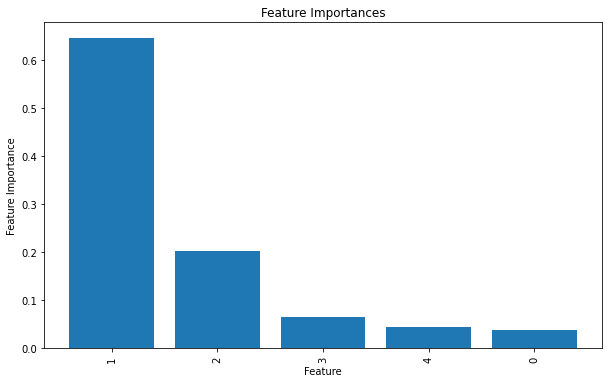

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_all, y)

# Initialize and fit a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the feature names
feature_names = X_train.columns

# Print feature importances
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

In [50]:
y_test

70      swine
56      swine
17      swine
51      swine
16      swine
6       swine
95     bovine
82      swine
78      swine
52      swine
67     bovine
63      swine
84     bovine
46      swine
54     bovine
65     bovine
8       swine
4       swine
69      swine
87     bovine
96     bovine
25     bovine
23      swine
66     bovine
13      swine
76      swine
81     bovine
79      swine
49     bovine
36      swine
29      swine
14      swine
59      swine
32      swine
27      swine
46     bovine
13     bovine
21     bovine
88      swine
35      swine
77      swine
16     bovine
70     bovine
42      swine
30     bovine
94     bovine
102    bovine
60     bovine
39     bovine
Name: category, dtype: object

In [ ]:
# Plotting training and Validation accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have defined X_train, y_train, X_val, and y_val as in your code

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier()

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Random Forest Classifier - Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.01, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Validation Accuracy")

plt.legend(loc="best")
plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# # Assuming you have a target column named 'target'
# dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']

# X = df_all_label_encoded.drop(columns=dropped_columns)
# y = df_all_label_encoded['category']
# label_encoder = LabelEncoder()
# # Fit the label encoder on the labels and transform them
# encoded_labels = label_encoder.fit_transform(y)
# encoded_labels
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels)

# # Initialize and train a random forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Initialize the random forest classifier
# rf_classifier = RandomForestClassifier()

# # Perform cross-validation
# scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
# mean_accuracy = scores.mean()

# print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2f}")


In [57]:
# # Predict on the validation set
# y_pred_valid = rf_classifier.predict(X_valid)

# # Calculate accuracy on the validation set
# accuracy_valid = accuracy_score(y_valid, y_pred_valid)
# print(f"Validation Accuracy: {accuracy_valid:.2f}")

In [58]:
# USe KN for exploration
# n_clusters = 3

# # Assuming X_train is your training data in numeric format (remove the astype(str) line)
# # X_train = ...

# # Cluster the training data using KMeans
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(X_train)

# # Calculate cluster centers
# cluster_centers = kmeans.cluster_centers_

# # Calculate the closest point in each cluster to the centroid
# closest_samples = pairwise_distances_argmin_min(cluster_centers, X_train)[0]

# # Calculate mean differences between cluster centers and closest samples
# mean_differences = np.abs(cluster_centers - X_train[closest_samples]).mean(axis=0)

# # Now you can proceed with sorting the feature indices and accessing column names
# sorted_feature_indices = np.argsort(mean_differences)[::-1]

# # Assuming X_train is a DataFrame and you want to access column names
# # sorted_column_names = X_train.columns[sorted_feature_indices]

# # Print sorted feature column names by importance
# # print("Sorted feature column names by importance:", sorted_column_names)

In [59]:
# X_valid.shape

In [60]:
# y_valid

In [95]:
# All countries
# Nigeria
df_nigeria_bovine=pd.read_csv("nigeria-df_bovine_label_encoding_custom_label_encoded.csv")
df_swine=pd.read_csv("nigeria-df_pig_label_encoding_custom_label_encoded.csv")
df_poultry=pd.read_csv("nigeria-poultry_label_custom_label_encoded.csv")
# Senegal
df_senegal=pd.read_csv("senegal_label_encoding_custom_label_encoded.csv")

# Kenya
df_kenya=pd.read_csv("kenya_label_encoding_custom_label_encoded.csv")
# Tanzania
df_tz=pd.read_csv("tanzania_label_encoding_custom_label_encoded.csv")

# # tunisia
df_tunisia=pd.read_csv("tunisia_label_encoding_custom_label_encoded.csv")
#morocco
# df_morocco=pd.read_csv("morocco_label_encoding_custom_label_encoded.csv")

# Mauritias
df_mauritias=pd.read_csv("mauritias_label_encoding_custom_label_encoded.csv")
# South Africa
df_sa=pd.read_csv("south_africa_label_encoding_custom_label_encoded.csv")


In [96]:
df_all=pd.concat([df_nigeria_bovine,df_swine,df_poultry,df_senegal,df_kenya,df_tz,df_tunisia,df_mauritias,df_sa])

In [97]:
df_all

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,2030247,2377766,2598379,2814783,3716166,3888876,4266800,4266830,4361572,4548647
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_all=df_all.fillna(0)
df_all.to_csv("merged_training_data.csv")

In [99]:
# Remove constant columns that are in mor than 90% of the samples
# Calculate the threshold for column removal
threshold = 0.9 * len(df_all)
# List to store the column names to be removed
columns_to_remove = []
# Iterate through each column
for column in df_all.columns:
    # Count the occurrences of the most frequent value in the column
    max_value_count = df_all[column].value_counts().max()
    # If the most frequent value count is greater than the threshold, or all values are the same
    if max_value_count > threshold or df_all[column].nunique() == 1:
        columns_to_remove.append(column)

# Remove the identified columns
df_filtered = df_all.drop(columns=columns_to_remove)
# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv("filtered_SNP_training_data.csv", index=False)


In [100]:
df_filtered

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,4824043,4825851,396260,577679,3576077,4392817,4524297,372920,372994,3520230
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
